In [76]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [77]:
housing = pd.read_csv(r'../Datasets/Housing.csv')
intervals = [(0, 50000), (50000, 100000), (100000, 150000), (150000, 200000)]

In [78]:
bins = pd.IntervalIndex.from_tuples(intervals)
housing['price_slab'] = pd.cut(housing['price'], bins)
housing['price_slab'].value_counts()

price_slab
(50000, 100000]     324
(0, 50000]          158
(100000, 150000]     58
(150000, 200000]      6
Name: count, dtype: int64

In [79]:
intervals = [(0, 5000), (5000, 10000), (10000, 15000), (15000, 20000)]
bins = pd.IntervalIndex.from_tuples(intervals)
housing['area_slab'] = pd.cut(housing['lotsize'], bins)
housing.drop(['price','lotsize'], axis=1, inplace=True)
housing['area_slab'].value_counts()

area_slab
(0, 5000]         310
(5000, 10000]     218
(10000, 15000]     16
(15000, 20000]      2
Name: count, dtype: int64

In [80]:
housing = housing.astype(object)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   bedrooms    546 non-null    object
 1   bathrms     546 non-null    object
 2   stories     546 non-null    object
 3   driveway    546 non-null    object
 4   recroom     546 non-null    object
 5   fullbase    546 non-null    object
 6   gashw       546 non-null    object
 7   airco       546 non-null    object
 8   garagepl    546 non-null    object
 9   prefarea    546 non-null    object
 10  price_slab  546 non-null    object
 11  area_slab   546 non-null    object
dtypes: object(12)
memory usage: 51.3+ KB


In [81]:
fp_df = pd.get_dummies(housing, prefix_sep='-')
fp_df

,bedrooms-1,bedrooms-2,bedrooms-3,bedrooms-4,bedrooms-5,bedrooms-6,bathrms-1,bathrms-2,bathrms-3,bathrms-4,...,prefarea-no,prefarea-yes,"price_slab-(0, 50000]","price_slab-(50000, 100000]","price_slab-(100000, 150000]","price_slab-(150000, 200000]","area_slab-(0, 5000]","area_slab-(5000, 10000]","area_slab-(10000, 15000]","area_slab-(15000, 20000]"
0,False,False,True,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,True,False,False
1,False,True,False,False,False,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
2,False,False,True,False,False,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
3,False,False,True,False,False,False,True,False,False,False,...,True,False,False,True,False,False,False,True,False,False
4,False,True,False,False,False,False,True,False,False,False,...,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,False,False,True,False,False,False,False,True,False,False,...,True,False,False,True,False,False,True,False,False,False
542,False,False,True,False,False,False,False,True,False,False,...,True,False,False,True,False,False,False,True,False,False
543,False,False,True,False,False,False,False,True,False,False,...,True,False,False,False,True,False,False,True,False,False
544,False,False,True,False,False,False,False,True,False,False,...,True,False,False,False,True,False,False,True,False,False


In [82]:
itemsets = apriori(fp_df, min_support=0.2, use_colnames=True)
print(fp_df)

     bedrooms-1  bedrooms-2  bedrooms-3  bedrooms-4  bedrooms-5  bedrooms-6  \
0         False       False        True       False       False       False   
1         False        True       False       False       False       False   
2         False       False        True       False       False       False   
3         False       False        True       False       False       False   
4         False        True       False       False       False       False   
..          ...         ...         ...         ...         ...         ...   
541       False       False        True       False       False       False   
542       False       False        True       False       False       False   
543       False       False        True       False       False       False   
544       False       False        True       False       False       False   
545       False       False        True       False       False       False   

     bathrms-1  bathrms-2  bathrms-3  bathrms-4  ..

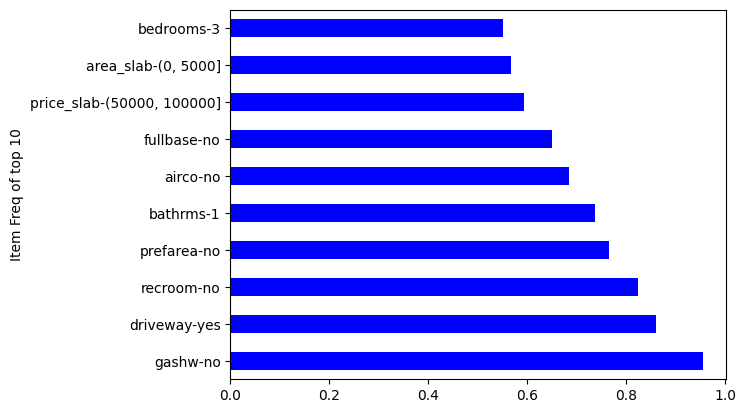

In [83]:
itemFreq = fp_df.sum(axis=0) / len(fp_df)

ax = itemFreq.nlargest(10).plot.barh(color='blue')

plt.ylabel('Item Freq of top 10')
plt.show()

In [84]:
rules = association_rules(itemsets, metric='confidence', min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bedrooms-2),(bathrms-1),0.249084,0.736264,0.234432,0.941176,1.278314,0.051041,4.483516,0.289939
1,(bedrooms-2),(stories-1),0.249084,0.415751,0.210623,0.845588,2.033882,0.107066,3.783708,0.676946
2,(bedrooms-2),(driveway-yes),0.249084,0.858974,0.212454,0.852941,0.992976,-0.001503,0.958974,-0.009332
3,(bedrooms-2),(recroom-no),0.249084,0.822344,0.219780,0.882353,1.072973,0.014947,1.510073,0.090569
4,(bedrooms-2),(gashw-no),0.249084,0.954212,0.239927,0.963235,1.009456,0.002247,1.245421,0.012474
...,...,...,...,...,...,...,...,...,...,...
7631,"(garagepl-0, area_slab-(0, 5000], bathrms-1)","(airco-no, recroom-no, prefarea-no, gashw-no)",0.327839,0.450549,0.210623,0.642458,1.425944,0.062915,1.536745,0.444402
7632,"(garagepl-0, airco-no, area_slab-(0, 5000])","(recroom-no, prefarea-no, bathrms-1, gashw-no)",0.309524,0.494505,0.210623,0.680473,1.376068,0.057561,1.582011,0.395802
7633,"(garagepl-0, airco-no, prefarea-no)","(area_slab-(0, 5000], bathrms-1, recroom-no, g...",0.338828,0.408425,0.210623,0.621622,1.521997,0.072237,1.563448,0.518728
7634,"(garagepl-0, area_slab-(0, 5000], recroom-no)","(airco-no, prefarea-no, bathrms-1, gashw-no)",0.340659,0.417582,0.210623,0.618280,1.480617,0.068369,1.525770,0.492319


In [85]:
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                                         antecedents  \
0                                       (bedrooms-2)   
1                                       (bedrooms-2)   
2                                       (bedrooms-2)   
3                                       (bedrooms-2)   
4                                       (bedrooms-2)   
...                                              ...   
7631    (garagepl-0, area_slab-(0, 5000], bathrms-1)   
7632     (garagepl-0, airco-no, area_slab-(0, 5000])   
7633             (garagepl-0, airco-no, prefarea-no)   
7634   (garagepl-0, area_slab-(0, 5000], recroom-no)   
7635  (garagepl-0, area_slab-(0, 5000], prefarea-no)   

                                            consequents   support  confidence  \
0                                           (bathrms-1)  0.234432    0.941176   
1                                           (stories-1)  0.210623    0.845588   
2                                        (driveway-yes)  0.212454    0.852941   
3  

In [86]:
rules.sort_values(by=['lift'], ascending=False).head(6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4516,"(price_slab-(0, 50000])","(airco-no, prefarea-no, bathrms-1, fullbase-no)",0.289377,0.333333,0.203297,0.702532,2.107595,0.106838,2.241135,0.739528
4503,"(airco-no, prefarea-no, bathrms-1, fullbase-no)","(price_slab-(0, 50000])",0.333333,0.289377,0.203297,0.609890,2.107595,0.106838,1.821596,0.788288
148,"(bedrooms-2, gashw-no)",(stories-1),0.239927,0.415751,0.205128,0.854962,2.056428,0.105378,4.028244,0.675882
6718,"(price_slab-(0, 50000])","(bathrms-1, airco-no, area_slab-(0, 5000], gas...",0.289377,0.338828,0.201465,0.696203,2.054738,0.103416,2.176358,0.722352
149,(bedrooms-2),"(stories-1, gashw-no)",0.249084,0.402930,0.205128,0.823529,2.043850,0.104765,3.383394,0.680139
1,(bedrooms-2),(stories-1),0.249084,0.415751,0.210623,0.845588,2.033882,0.107066,3.783708,0.676946


In [87]:
rule_df = rules.sort_values(by=['lift', 'confidence'], ascending=False)
rule_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4516,"(price_slab-(0, 50000])","(airco-no, prefarea-no, bathrms-1, fullbase-no)",0.289377,0.333333,0.203297,0.702532,2.107595,0.106838,2.241135,0.739528
4503,"(airco-no, prefarea-no, bathrms-1, fullbase-no)","(price_slab-(0, 50000])",0.333333,0.289377,0.203297,0.609890,2.107595,0.106838,1.821596,0.788288
148,"(bedrooms-2, gashw-no)",(stories-1),0.239927,0.415751,0.205128,0.854962,2.056428,0.105378,4.028244,0.675882
6718,"(price_slab-(0, 50000])","(bathrms-1, airco-no, area_slab-(0, 5000], gas...",0.289377,0.338828,0.201465,0.696203,2.054738,0.103416,2.176358,0.722352
149,(bedrooms-2),"(stories-1, gashw-no)",0.249084,0.402930,0.205128,0.823529,2.043850,0.104765,3.383394,0.680139
...,...,...,...,...,...,...,...,...,...,...
679,"(driveway-yes, area_slab-(5000, 10000])",(prefarea-no),0.384615,0.765568,0.238095,0.619048,0.808612,-0.056354,0.615385,-0.277778
849,"(fullbase-yes, gashw-no)",(prefarea-no),0.333333,0.765568,0.205128,0.615385,0.803828,-0.050061,0.609524,-0.267974
2499,"(driveway-yes, area_slab-(5000, 10000], gashw-no)",(prefarea-no),0.369963,0.765568,0.227106,0.613861,0.801838,-0.056126,0.607119,-0.281740
75,(fullbase-yes),(recroom-no),0.349817,0.822344,0.219780,0.628272,0.764001,-0.067890,0.477919,-0.322077


In [88]:
print(rule_df[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                                            antecedents  \
4516                            (price_slab-(0, 50000])   
4503    (airco-no, prefarea-no, bathrms-1, fullbase-no)   
148                              (bedrooms-2, gashw-no)   
6718                            (price_slab-(0, 50000])   
149                                        (bedrooms-2)   
...                                                 ...   
679             (driveway-yes, area_slab-(5000, 10000])   
849                            (fullbase-yes, gashw-no)   
2499  (driveway-yes, area_slab-(5000, 10000], gashw-no)   
75                                       (fullbase-yes)   
717                            (fullbase-yes, gashw-no)   

                                            consequents   support  confidence  \
4516    (airco-no, prefarea-no, bathrms-1, fullbase-no)  0.203297    0.702532   
4503                            (price_slab-(0, 50000])  0.203297    0.609890   
148                                         (sto

In [89]:
relv_df = rule_df[rule_df['lift']>1]
relv_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4516,"(price_slab-(0, 50000])","(airco-no, prefarea-no, bathrms-1, fullbase-no)",0.289377,0.333333,0.203297,0.702532,2.107595,0.106838,2.241135,0.739528
4503,"(airco-no, prefarea-no, bathrms-1, fullbase-no)","(price_slab-(0, 50000])",0.333333,0.289377,0.203297,0.609890,2.107595,0.106838,1.821596,0.788288
148,"(bedrooms-2, gashw-no)",(stories-1),0.239927,0.415751,0.205128,0.854962,2.056428,0.105378,4.028244,0.675882
6718,"(price_slab-(0, 50000])","(bathrms-1, airco-no, area_slab-(0, 5000], gas...",0.289377,0.338828,0.201465,0.696203,2.054738,0.103416,2.176358,0.722352
149,(bedrooms-2),"(stories-1, gashw-no)",0.249084,0.402930,0.205128,0.823529,2.043850,0.104765,3.383394,0.680139
...,...,...,...,...,...,...,...,...,...,...
518,"(price_slab-(50000, 100000], stories-2)",(driveway-yes),0.260073,0.858974,0.223443,0.859155,1.000210,0.000047,1.001282,0.000284
685,"(recroom-no, fullbase-no)",(gashw-no),0.602564,0.954212,0.575092,0.954407,1.000204,0.000117,1.004274,0.000514
690,(gashw-no),"(recroom-no, fullbase-no)",0.954212,0.602564,0.575092,0.602687,1.000204,0.000117,1.000310,0.004459
1025,"(bedrooms-3, prefarea-no)","(bathrms-1, gashw-no)",0.390110,0.708791,0.276557,0.708920,1.000182,0.000050,1.000443,0.000298


In [90]:
print(relv_df[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                                          antecedents  \
4516                          (price_slab-(0, 50000])   
4503  (airco-no, prefarea-no, bathrms-1, fullbase-no)   
148                            (bedrooms-2, gashw-no)   
6718                          (price_slab-(0, 50000])   
149                                      (bedrooms-2)   
...                                               ...   
518           (price_slab-(50000, 100000], stories-2)   
685                         (recroom-no, fullbase-no)   
690                                        (gashw-no)   
1025                        (bedrooms-3, prefarea-no)   
3253                 (stories-1, bathrms-1, gashw-no)   

                                            consequents   support  confidence  \
4516    (airco-no, prefarea-no, bathrms-1, fullbase-no)  0.203297    0.702532   
4503                            (price_slab-(0, 50000])  0.203297    0.609890   
148                                         (stories-1)  0.205128    0.8